#Data Science Capstone
***

```
this notebook is used for data science capstone project. highly recommeded to run on jupyter environment
```

    author: kevin elfri
github: [kevin's repo](https://github.com/zylbergs/zylpy)

# Problem Understanding

1. we want to open new coffee shop branch in somewhere in yogyakarta
2. provide location options to estabilish the new branch
3. location option should in village level
4. cannot afford third party data vendor
5. preferably presented in geological map
6. success criteria : location with lowest competitors and higest potential customers
7. the data required might be scattered somewhere in open public
8. our target customers are college university students and office workers
9. we know that working place and college university mainly available in two main regency : Sleman and Kota Yogykarta


# Analytics Approach
1. Geospatial analysis and visualization
2. Clustering 

# Data Requirements
1. sub district data
2. places/venues
3. geo coordinate


# Data Collection

1. web scraping
2. foursquare api request
3. nominatim openstreetmap

# Data Understanding
1. EDA
2. Geospatial visualzation
3. cluster label

# Data Preparation
1. Data ingesition
2. data reformating
3. feature selection
4. missing value handling
5. correct wrong information

# Modeling
1. Spatial Visualization
2. Clustering : KMeans

# Evaluation
1. Inertia
2. cluster label understading

# Deployment
1. map html
2. model object: joblib/pickle format

# Working Section

### import required library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
import requests
import json
from bs4 import BeautifulSoup

!pip install geopy
!pip install folium
!pip install selenium

from geopy.geocoders import Nominatim
import folium 
import selenium
from selenium import webdriver
import sys
import joblib
import pickle
#colabs requirements
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 4.3MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [61.8 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates In

In [ ]:
pd.set_option('display.max_rows',None)

# Web scraping Section

### Data Version 1

In [ ]:
#credentials
client_id = '3DDRIZ0SKFRREIRMDBN30EFPHWBZ1ROU3CHHK4E3PMSXA0W3'
client_secret = 'ZLSBPJSRJKAMGSSK1IYBD1HMP02DKDYCZHAJDK0PZDDKHU3J'
client_id2 = 'ILH0RNQVV3NDMRFLFSZMNFXDM02DDQEQ5AIKRMMKO0BVRPER'
client_secret2 = '4AGDUDTRM4VUHYM3FEJGSWT4P3ZWTMEGG5OUVSIMTTVEW2ZF'
version = '20200701'


In [ ]:
#Yogyakarta sub district citizen demographic

url = ['https://kependudukan.jogjaprov.go.id/statistik/penduduk/jumlahpenduduk/15/0/00/0{}/34.ez'.format(i+1) for i in range(4)]
url2 = ['https://id.wikipedia.org/wiki/Daftar_kapanewon,_kemantren,_kalurahan,_dan_kelurahan_di_Daerah_Istimewa_Yogyakarta']
#url[0] is kulon progo
#url[1] is bantul
#url[2] is gunung kidul
#url[3] is sleman
#url[4] is kota yogyakarta
url

['https://kependudukan.jogjaprov.go.id/statistik/penduduk/jumlahpenduduk/15/0/00/01/34.ez',
 'https://kependudukan.jogjaprov.go.id/statistik/penduduk/jumlahpenduduk/15/0/00/02/34.ez',
 'https://kependudukan.jogjaprov.go.id/statistik/penduduk/jumlahpenduduk/15/0/00/03/34.ez',
 'https://kependudukan.jogjaprov.go.id/statistik/penduduk/jumlahpenduduk/15/0/00/04/34.ez']

In [ ]:
source = requests.get(url2[0]).text
soup = BeautifulSoup(source,'lxml')

#limit the result to only two regency: SLEMAN, KOTA YOGYAKARTA
#idx 0 : Sleman, idx 1: kota yogyakarta
tables = soup.find_all('table')[4:6]

In [ ]:
def return_subdist_village(data,index=None):
    sub_district = []
    village = []
    clean_village = []
    #per row scope
    rows = data.find_all('tr')
    for i in rows[1:]:
        if i.find('a') == None:
            continue
        else:
            sub_district.append(i.find('a').text) # a tag: subdistrict data
        #ul, li tag: village data
        villages = i.find('ul')
        villages2 = i.find_all('li')
        village.append(villages.text.split('\n'))
        for j in villages2:
            clean_village.append(j.text)

    newsub = list()
    #attemp to match subdistrict and village length
    for i,j in zip(sub_district,village):
        new = [i for a in range(len(j))]
        newsub.append(new)
    #flatten the result
    newsub = [y for x in newsub for y in x]
    #converting into pandas dataframe
    if index == 0:
        df = pd.DataFrame({'Regency':['Sleman' for i in range(len(newsub))],
                           'Sub_District':newsub,
                           'Village':clean_village})
    else:
        df = pd.DataFrame({'Regency':['Kota Yogyakarta' for i in range(len(newsub))],
                           'Sub_District':newsub,
                           'Village':clean_village})
        
    return df

In [ ]:
def generate_coordinate(data):
    lat = []
    lon=[]
    for i in data['Village']:
        query = f'{i}, Yogyakarta'
        geolocator = Nominatim(user_agent='kevinelfri@ymail.com')
        coords = geolocator.geocode(query)
        try:
            lat.append(coords.latitude)
            lon.append(coords.longitude)
        except:
            lat.append(np.nan)
            lon.append(np.nan)
    data = data
    data['Latitude'] = lat
    data['Longitude'] = lon
    return data


In [ ]:
sleman = return_subdist_village(tables[0],index=0)
kota_yk = return_subdist_village(tables[1],index=1)
full_regency = pd.concat([sleman,kota_yk],axis=0).reset_index(drop=True)
#correcting wrong name
full_regency.loc[full_regency['Village']=='Wukisari','Village'] = 'Wukirsari'
full_regency.loc[full_regency['Village']=='Mujamuju','Village'] = 'Muja muju'
#generate coordinate
full_regency = generate_coordinate(full_regency)
#-7.7492391,110.2856145 : recalibration coords 
full_regency.loc[full_regency['Village']=='Sidorejo','Latitude'] = -7.7492391
full_regency.loc[full_regency['Village']=='Sidorejo','Longitude'] = 110.2856145
full_regency.loc[full_regency['Village']=='Triharjo','Latitude'] = -7.6945594
full_regency.loc[full_regency['Village']=='Triharjo','Longitude'] = 110.3502065

In [ ]:
#check null values
full_regency.loc[full_regency['Longitude'].isnull()]

Empty DataFrame
Columns: [Regency, Sub_District, Village, Latitude, Longitude]
Index: []

### Data Version 2

In [ ]:
def yogya_demographics():
    regency = ['Kulon Progo','Bantul','Gunung Kidul','Sleman']
    yk_regency = ['Kota Yogyakarta']
    urls = ['https://kependudukan.jogjaprov.go.id/statistik/penduduk/jumlahpenduduk/15/0/00/0{}/34.ez'.format(i+1) for i in range(4)]
    yk_url = 'https://kependudukan.jogjaprov.go.id/statistik/penduduk/jumlahpenduduk/15/0/00/71/34.ez'
    df = pd.DataFrame()
    
    
    for ix,url in enumerate(urls):
        #retrieve source code
        source = requests.get(url).text
        #parsing the source code
        soup = BeautifulSoup(source,'lxml')
        base = soup.find('div',class_='tabscroll').find('table')
        row = base.find_all('tr',class_='statistik')

        #get sub district data
        subdist = [i.find_all('td')[0].a.text for i in row]
        #get population data
        pop = [j.text.strip() for i in row for j in i.find_all('td',class_="angka statistik jumstat")]
        #get regency data
        reg = [regency[ix] for i in range(len(subdist))]
        data = pd.DataFrame({'Regency':reg,'Sub_District':subdist,'Population':pop})
        
        df = df.append(data)

    #Kota Yogyakarta has different link
    source = requests.get(yk_url).text
    #parsing the source code
    soup = BeautifulSoup(source,'lxml')
    base = soup.find('div',class_='tabscroll').find('table')
    row = base.find_all('tr',class_='statistik')

    #get sub district data
    subdist = [i.find_all('td')[0].a.text for i in row]
    #get population data
    pop = [j.text.strip() for i in row for j in i.find_all('td',class_="angka statistik jumstat")]
    #get regency data
    reg = [yk_regency[0] for i in range(len(subdist))]
    data = pd.DataFrame({'Regency':reg,'Sub_District':subdist,'Population':pop})
    df = df.append(data)

    lat=[]
    lon=[]
    geolocator = Nominatim(user_agent='kevinelfri@ymail.com')
    for i,j in zip(df['Sub_District'],df['Regency']):
        query = '{}, {}'.format(i,j)
        coords = geolocator.geocode(query)
        lat.append(coords.latitude)
        lon.append(coords.longitude)
    df['Latitude'] = lat
    df['Longitude'] = lon
    return df

In [ ]:
df = yogya_demographics()

# Spatial Visualization

In [ ]:
def yog_map(data,use_border=True,geojson_path=None):
    yog_query = 'Yogyakarta, ID'
    geolocator= Nominatim(user_agent='kevinelfri@ymail.com')
    yog_coords = geolocator.geocode(yog_query)

    yog_map = folium.Map(location=[yog_coords.latitude,yog_coords.longitude],zoom_start=11)
    if use_border ==True:
        folium.GeoJson(geojson_path, name="geojson").add_to(yog_map)
    for i,j,s,r in zip(data['Latitude'],data['Longitude'],data['Village'],data['Sub_District']):
        label ='{}, {}, Yogyakarta'.format(s,r)
        label = folium.Popup(label,parse_html=True)
        folium.CircleMarker(location=[i,j],popup=label,color='red',fill=True,fill_color='red',fill_opacity=0.4).add_to(yog_map)
    return yog_map

In [ ]:
yogyakarta_map = yog_map(full_regency,geojson_path='/content/YK_geojson.geojson')
yogyakarta_map

# Request Required Venues using Fourquare

In [ ]:
college = []
for i,j in zip(full_regency['Latitude'],full_regency['Longitude']):
    # college category 4d4b7105d754a06372d81259
    college_request = f'https://api.foursquare.com/v2/venues/explore?client_id={client_id2}&client_secret={client_secret2}&v={version}&ll={i},{j}&limit=100&radius=700&q=College%20%26%20University&categoryId=4d4b7105d754a06372d81259'
    college_results = requests.get(college_request).json()
    try:
        college.append(len(college_results['response']['groups'][0]['items']))
    except:
        college.append(0)


In [ ]:
office = []
for i,j in zip(full_regency['Latitude'],full_regency['Longitude']):
    #coffee category 4bf58dd8d48988d1e0931735
    office_request = f'https://api.foursquare.com/v2/venues/explore?client_id={client_id2}&client_secret={client_secret2}&v={version}&ll={i},{j}&limit=100&radius=700&categoryId=4bf58dd8d48988d124941735'
    office_results = requests.get(office_request).json()
    try:
        office.append(len(office_results['response']['groups'][0]['items']))
    except:
        office.append(0)

In [ ]:
coffee = []
for i,j in zip(full_regency['Latitude'],full_regency['Longitude']):
    # office category 4bf58dd8d48988d124941735
    coffee_request = f'https://api.foursquare.com/v2/venues/explore?client_id={client_id2}&client_secret={client_secret2}&v={version}&ll={i},{j}&limit=100&radius=700&categoryId=4bf58dd8d48988d1e0931735'
    coffee_results = requests.get(coffee_request).json()
    try:
        coffee.append(len(coffee_results['response']['groups'][0]['items']))
    except:
        coffee.append(0)

# Combine All information to DataFrame

In [ ]:
full_regency['Number_College_Venues'] = college
full_regency['Number_Office_Venues'] = office
full_regency['Number_Coffee_Venues'] = coffee

In [ ]:
#full_regency.to_csv('Final_Data_SLE_YK.csv',index=False,index_label=False)

# Clustering Section

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = full_regency[['Number_College_Venues','Number_Office_Venues','Number_Coffee_Venues']]

In [ ]:
def best_k_kmeans(X,n_clu):
    inertia = []
    for i in range(n_clu):
        kmeans = KMeans(n_clusters=i+1,random_state=1,algorithm='elkan')
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.plot(range(1,n_clu+1),inertia)
    plt.xlabel('N Cluster')
    plt.ylabel('Inertia')
    plt.show
    return inertia


[41283.48091603054,
 17180.796726190478,
 9430.934865900384,
 7349.295977011496,
 6033.778365045807,
 4885.949741315595,
 4006.184756532719,
 3451.7106767549394,
 2962.193342391304,
 2668.693342391304]

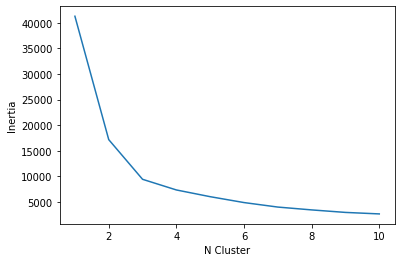

In [ ]:
cluster_result = best_k_kmeans(X,10)
cluster_result

In [ ]:
best_k = 3
kmeans = KMeans(n_clusters=3,algorithm='elkan')
kmeans.fit(X)
clu_label = kmeans.labels_
full_regency['Cluster_Label'] = clu_label

In [ ]:
filename = 'Coffee_NewBranch_Kmeans_cluster.pkl'
with open(filename,'wb') as f:
    pickle.dump(kmeans,f)
    f.close()

In [ ]:
full_regency.head()

Regency Sub_District  ... Number_Coffee_Venues  Cluster_Label
0  Sleman       Berbah  ...                    1              0
1  Sleman       Berbah  ...                    0              0
2  Sleman       Berbah  ...                    2              0
3  Sleman       Berbah  ...                    0              0
4  Sleman  Cangkringan  ...                    0              0

[5 rows x 9 columns]

# Visualizing the Cluster

In [ ]:
def yog_cluster_map(kclusters= 3):
    yog_query = 'Yogyakarta, ID'
    geolocator= Nominatim(user_agent='kevinelfri@ymail.com')
    yog_coords = geolocator.geocode(yog_query)
    yog_map = folium.Map(location=[yog_coords.latitude,yog_coords.longitude],zoom_start=11)
    

    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    for lat, lon, poi, cluster in zip(full_regency['Latitude'], full_regency['Longitude'], full_regency['Village'], full_regency['Cluster_Label']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(yog_map)
       
    return yog_map

In [ ]:
yog_cluster_map()

In [ ]:
yogyakarta_map.save('Sleman_Yogyakarta_village.html')
yog_cluster_map().save('Village Cluster Map.html')

# Cluster Result Analysis

In [ ]:
clu_1 = full_regency.loc[full_regency['Cluster_Label'] == 0]
clu_2 = full_regency.loc[full_regency['Cluster_Label'] == 1]
clu_3 = full_regency.loc[full_regency['Cluster_Label'] == 2]

In [ ]:
clu_1.head()

Regency Sub_District  ... Number_Coffee_Venues  Cluster_Label
0  Sleman       Berbah  ...                    1              0
1  Sleman       Berbah  ...                    0              0
2  Sleman       Berbah  ...                    2              0
3  Sleman       Berbah  ...                    0              0
4  Sleman  Cangkringan  ...                    0              0

[5 rows x 9 columns]

In [ ]:
clu_1.agg({'Number_College_Venues':['sum'],'Number_Office_Venues':['sum'],'Number_Coffee_Venues':['sum']})

Number_College_Venues  Number_Office_Venues  Number_Coffee_Venues
sum                    246                    54                   178

In [ ]:
clu_2.agg({'Number_College_Venues':['sum'],'Number_Office_Venues':['sum'],'Number_Coffee_Venues':['sum']})

Number_College_Venues  Number_Office_Venues  Number_Coffee_Venues
sum                    708                   487                   408

In [ ]:
clu_3.agg({'Number_College_Venues':['sum'],'Number_Office_Venues':['sum'],'Number_Coffee_Venues':['sum']})

Number_College_Venues  Number_Office_Venues  Number_Coffee_Venues
sum                    177                   286                   319

# Conclussion

key takeaway: 
1. based on the goal criteria, one can choose to open new branch in any of **cluster 2 village location**
2. **cluster 2 is worth taking** because it has *most of potential customers* than other cluster label
3. ratio of potential customers over competitors in cluster 1 = 17 : 10
4. ratio of potential customers over competitors in cluster 2 = 29 : 10
5. ratio of potential customers over competitors in cluster 3 = 3 : 2